In the following example, you will try to predict the vote of people during an election in the United Kingdom by knowing some information on their knowledge and political orientation.

## 0. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import metrics
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

##  1. Reading data

In [2]:
df = pd.read_csv("data/BEPS.csv")

In [3]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Kennedy,Europe,political.knowledge,gender
0,Liberal Democrat,43,3,3,4,1,4,2,2,female
1,Labour,36,4,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,3,2,male
3,Labour,24,4,2,2,1,3,4,0,female
4,Labour,41,2,2,1,1,4,6,2,male


In [4]:
df.shape

(1525, 10)

In [5]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Kennedy,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,3.135082,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,1.081997,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,3.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


## 2. Exploratory Data Analysis

### 2.1. Missing Values

Check if the dataset contain any missing values.

In [6]:
print(f'number of null values: {df.isnull().sum()}.')
print(f'number of na values: {df.isna().sum()}')

number of null values: vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Kennedy                    0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64.
number of na values: vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Kennedy                    0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


### 2.2. Distribution of the target variable

Plot the distribution of the target variable.

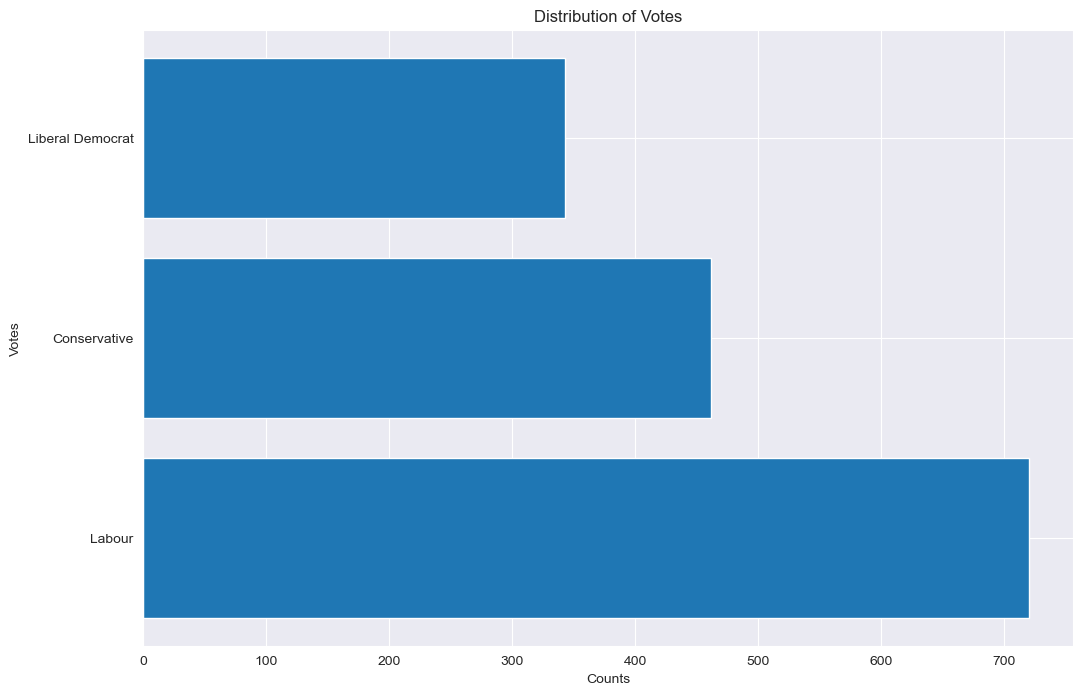

In [7]:
# Assuming df is your DataFrame and 'vote' is your column of interest.
vote_counts = df['vote'].value_counts()
votes = vote_counts.index
counts = vote_counts.values

plt.figure(figsize=(12, 8))
plt.barh(votes, counts)
plt.xlabel('Counts')
plt.ylabel('Votes')
plt.title('Distribution of Votes')
plt.show()

### 2.3. Distribution of numerical variables

Plot the distribution of the numerical features.

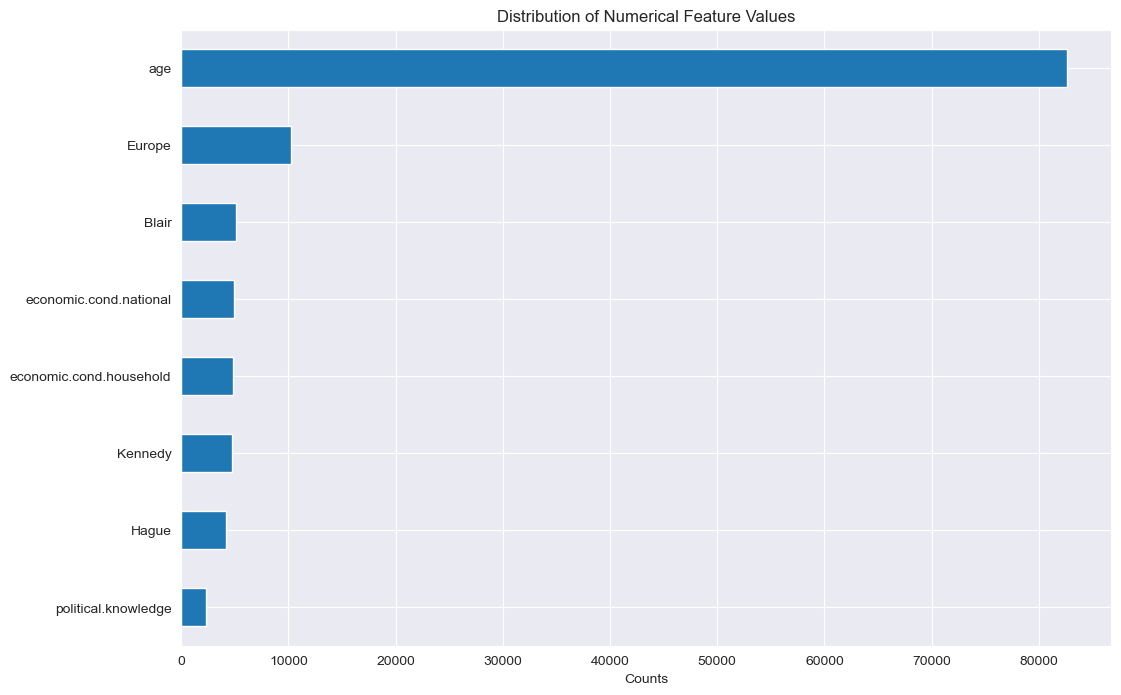

In [8]:
numerical_feature_counts = df.select_dtypes(include=['int64', 'float64']).sum().sort_values()

# using DataFrame plot for simpler and more direct plotting
numerical_feature_counts.plot(kind='barh', figsize=(12, 8))
plt.xlabel('Counts')
plt.title('Distribution of Numerical Feature Values')
plt.show()

### 2.4. Histogram of catagorical variables

Plot the histogram of the catagorical features.

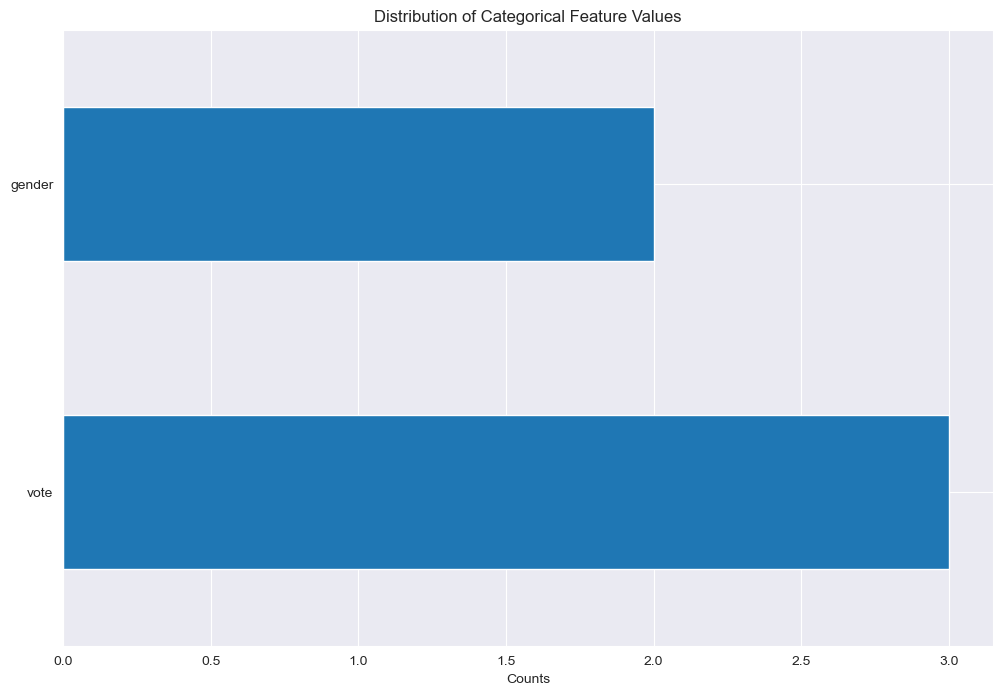

In [9]:
categorical_feature_counts = df.select_dtypes(include=['object']).nunique()
# using DataFrame plot for simpler and more direct plotting
categorical_feature_counts.plot(kind='barh', figsize=(12, 8))
plt.xlabel('Counts')
plt.title('Distribution of Categorical Feature Values')
plt.show()

## 3. Data Splitting

Split the dataset into 2 training and test datasets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('vote', axis=1), df['vote'], random_state=42)

## 4. Feature Engineering

### 4.1. Scaling numerical variables

In [11]:
# Scaling numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])


### 4.2. Catagorical variables encoding

Convert catagorical columns into numerical columns using label encoding or one hot encoding.

In [12]:
# Selecting categorical features
categorical_features = X_train.select_dtypes(include=['object']).columns

# Applying OneHotEncoder to categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_train = pd.DataFrame(encoder.fit_transform(X_train[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))
encoded_test = pd.DataFrame(encoder.transform(X_test[categorical_features]), columns=encoder.get_feature_names_out(categorical_features))

# Dropping original categorical features and concatenating the encoded features
X_train_encoded = pd.concat([X_train.drop(categorical_features, axis=1).reset_index(drop=True), encoded_train], axis=1)
X_test_encoded = pd.concat([X_test.drop(categorical_features, axis=1).reset_index(drop=True), encoded_test], axis=1)



## 5. Logistic Regression

Fit a logistic regression model on the training set. Evaluate the model on the testing set. Use the F1score as an evaluation metric.

In [13]:
# Initialize and fit the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_encoded, y_train)

# Make predictions on the testing set
y_pred = logistic_model.predict(X_test_encoded)

# Evaluate the model using F1 score
f1 = metrics.f1_score(y_test, y_pred, average='weighted')

# Display the F1 score to the user
f"Model F1 Score: {f1:.4f}"

'Model F1 Score: 0.6076'

## 6. Decision Tree

Fit a decision tree model on the training set. Use cross-validation in order to tune the hyperparameters of the decision tree model. Evaluate the model on the testing set. Use the Macro F1score as an evaluation metric.

In [14]:
# Define the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Set up hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up cross-validation with GridSearch to find the best hyperparameters
scorer = metrics.make_scorer(metrics.f1_score, average='macro')
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring=scorer)

# Fit the model on the training set
grid_search.fit(X_train_encoded, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test_encoded)
macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')
print(f"Macro F1 Score on the test set: {macro_f1}")
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

Macro F1 Score on the test set: 0.5269181444251917
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


Plot the decision tree.

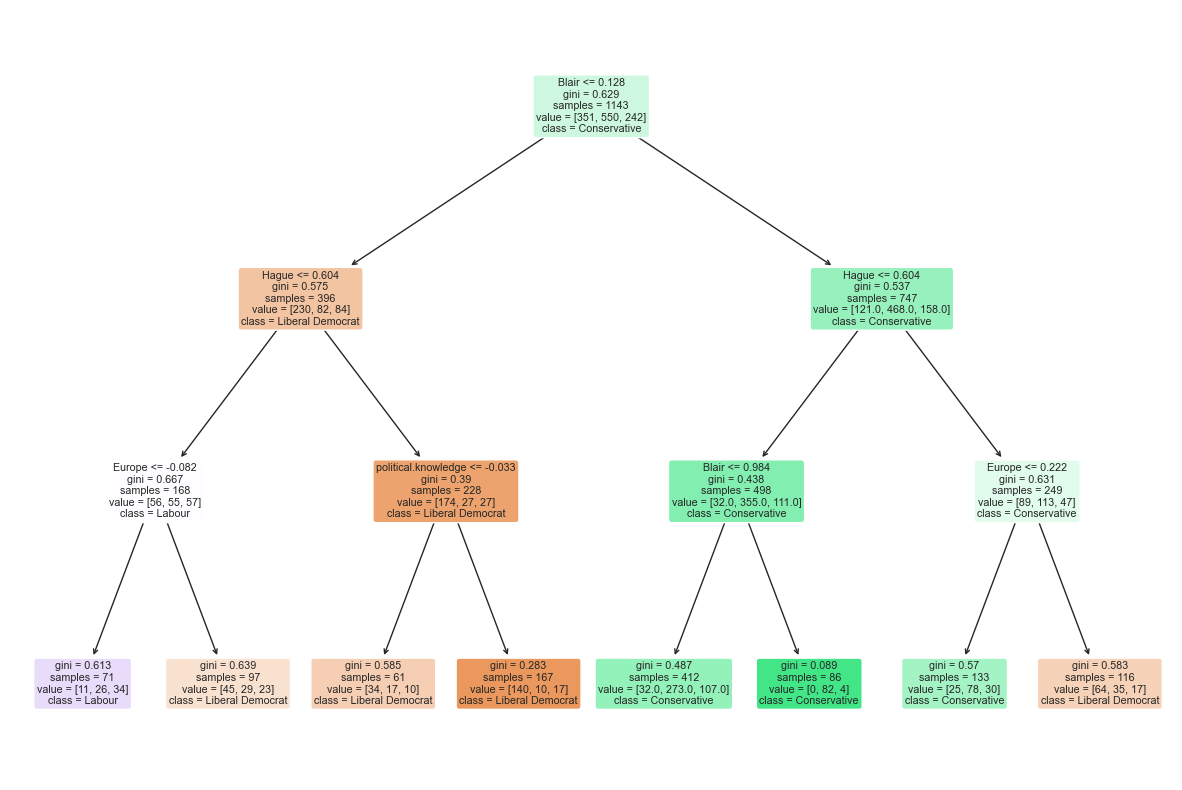

In [15]:
unique_class_names = y_train.astype(str).unique()

fig, ax = plt.subplots(figsize=(15, 10))  # Set desired figure size
tree.plot_tree(best_model,
               feature_names=X_train.columns,
               class_names=unique_class_names,
               filled=True,
               rounded=True,
               ax=ax)
plt.show()


## 7. Random Forest

Fit a random forest model on the training set. Use cross-validation in order to tune the hyperparameters of the random forest model. Evaluate the model on the testing set. Use the Macro F1score as an evaluation metric.

In [16]:
random_forest = RandomForestClassifier( random_state=42)

param_grid_rf = {
    'n_estimators': [1, 100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Set up the Grid Search with cross-validation
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1) 
grid_search_rf.fit(X_train_encoded, y_train)

best_params_rf = grid_search_rf.best_params_

print("Best Hyperparameters:", best_params_rf)

random_forest_best_model = RandomForestClassifier(**best_params_rf, random_state=42)

random_forest_best_model.fit(X_train_encoded, y_train)
# Make predictions on the testing set
y_pred_rf = random_forest_best_model.predict(X_test_encoded)
# Evaluate the model using F1 score
f1_rf = metrics.f1_score(y_test, y_pred_rf, average='weighted')
# Display the F1 score to the user
f"Random Forest Model F1 Score: {f1_rf:.4f}"

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


'Random Forest Model F1 Score: 0.5919'

Plot feature importance/weight.

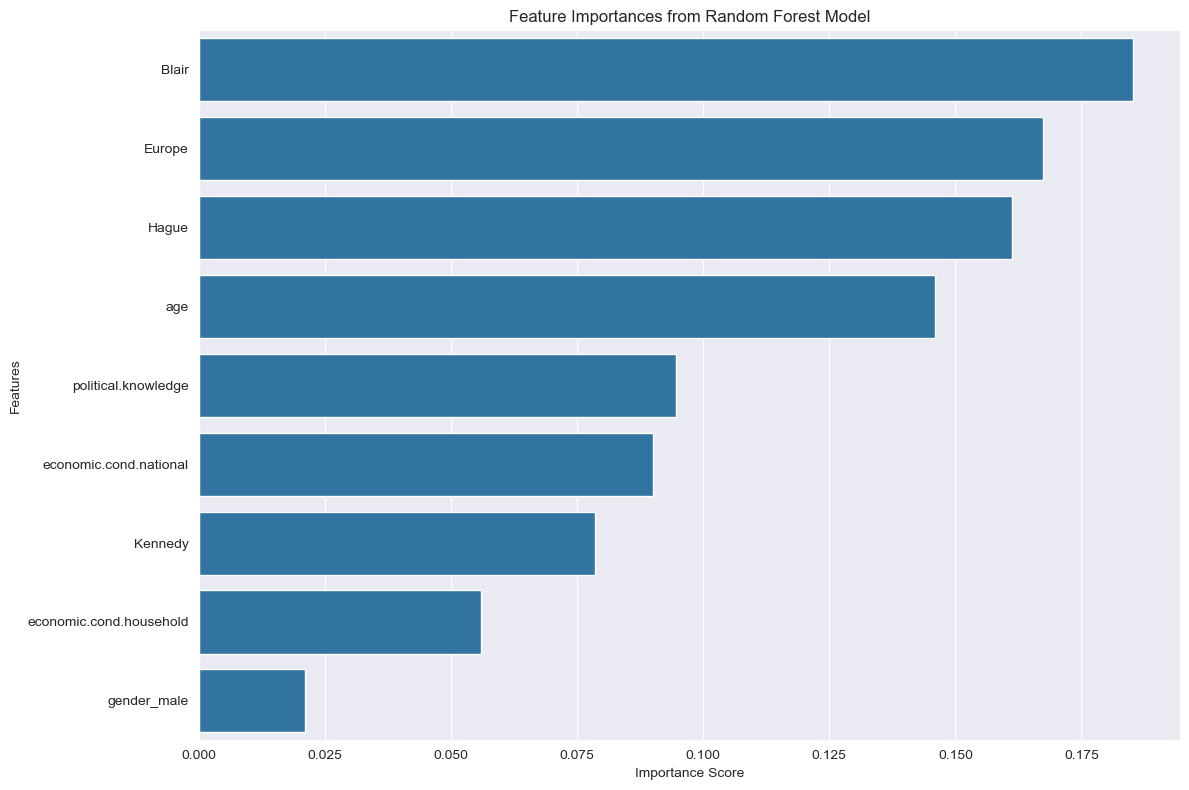

In [19]:
# Extract feature importances from the trained model
feature_importances = random_forest_best_model.feature_importances_

# Get the feature names
feature_names = X_train_encoded.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


## 8. Gradient Boosting

Fit a gradient boosting model on the training set. Use cross-validation in order to tune the hyperparameters of the gradient boosting model. Evaluate the model on the testing set. Use the Macro F1score as an evaluation metric.

In [20]:
from sklearn.metrics import classification_report

# Defining the model
gb = GradientBoostingClassifier(random_state=42)

# Defining the hyperparameters to tune
param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    
}

# Setting up the grid search that'll do the cross validation
grid = GridSearchCV(estimator=gb, param_grid=param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the grid search
grid.fit(X_train_encoded, y_train)

# Getting the best parameters
best_params = grid.best_params_

# Setting up and training the model with the best parameters
best_model = GradientBoostingClassifier(**best_params, random_state=42)
best_model.fit(X_train_encoded, y_train)

# Make predictions on the testing set
y_pred = best_model.predict(X_test_encoded)



In [21]:
# Evaluate the model with Macro F1 Score
print(classification_report(y_test, y_pred, target_names=unique_class_names))

f1 = metrics.f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score on the test set: {f1}")

                  precision    recall  f1-score   support

Liberal Democrat       0.66      0.70      0.68       111
    Conservative       0.67      0.81      0.73       170
          Labour       0.59      0.34      0.43       101

        accuracy                           0.65       382
       macro avg       0.64      0.62      0.61       382
    weighted avg       0.64      0.65      0.64       382

F1 Score on the test set: 0.6353237376986409


Plot feature importance/weight.

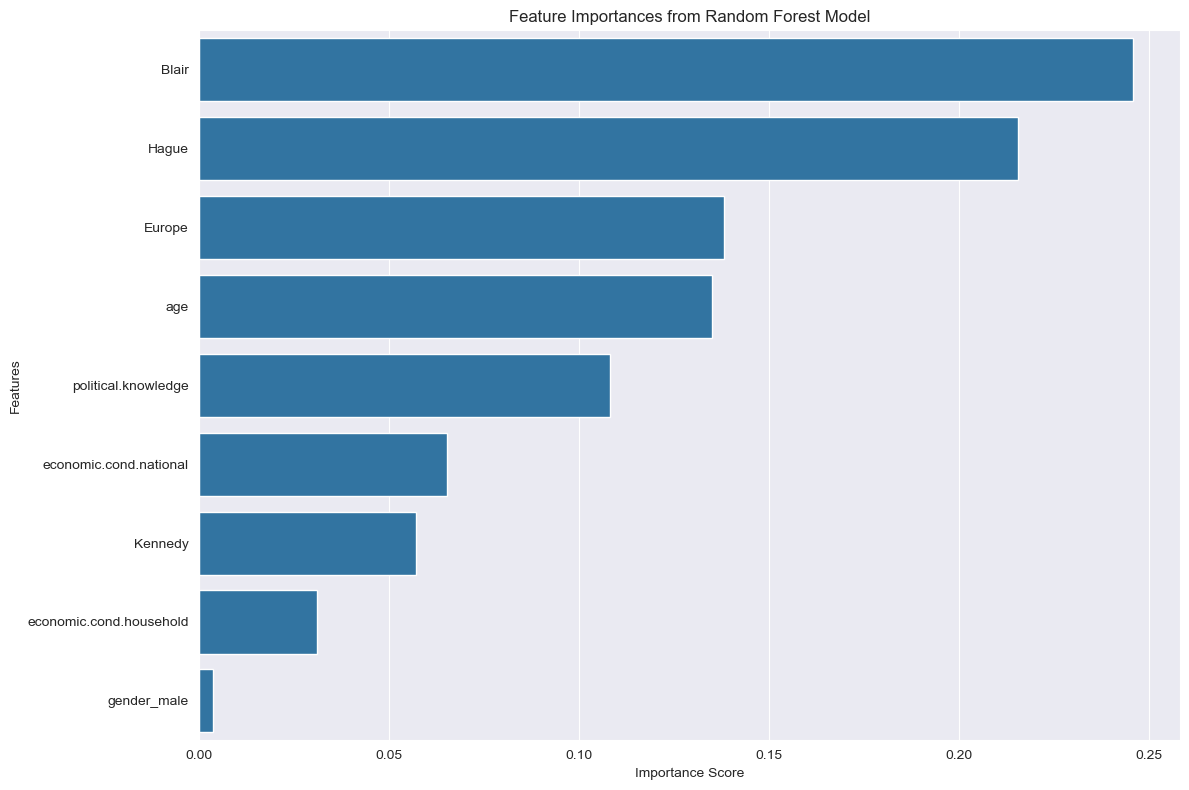

In [23]:
# Extract feature importances from the trained model
feature_importances = best_model.feature_importances_

# Get the feature names
feature_names = X_train_encoded.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
